<a href="https://colab.research.google.com/github/yahdiindrawan/GoldPricePrediction-LinearRegression/blob/main/GoldPricePrediction-LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
df = pd.read_csv('dataset.csv', usecols=['Tanggal','HargaJual','KursJual','TingkatInflasi','HargaMinyak'])
tanggal = pd.DataFrame(df.Tanggal.astype(str).str.split('-').tolist(),columns="year month date".split())
data = {
    'Tahun' : tanggal['year'],
    'Bulan' : tanggal['month'],
    'Tanggal' : tanggal['date'],
    'HargaJual' : df['HargaJual'],
    'KursJual' : df['KursJual'],
    'TingkatInflasi' : df['TingkatInflasi'],
    'HargaMinyak' : df['HargaMinyak']
}
data = pd.DataFrame(data)
data

,Tahun,Bulan,Tanggal,HargaJual,KursJual,TingkatInflasi,HargaMinyak
0,2019,12,30,678000.0,14014.73,2.72,61.68
1,2019,12,27,678000.0,14025.78,2.72,61.72
2,2019,12,26,673000.0,14051.91,2.72,61.68
3,2019,12,23,665000.0,14047.89,2.72,60.52
4,2019,12,21,665000.0,14062.97,2.72,60.44
...,...,...,...,...,...,...,...
70,2019,10,05,684000.0,14206.00,3.13,52.81
71,2019,10,04,688000.0,14206.00,3.13,52.81
72,2019,10,03,685000.0,14264.00,3.13,52.45
73,2019,10,02,676000.0,14278.00,3.13,52.64


In [3]:
from sklearn.preprocessing import StandardScaler
def tranformasi_data(x_all, x_tr):
    scaler = StandardScaler()
    scaler.fit(x_all)
    x_all_tr = scaler.transform(x_tr)
    return x_all_tr

In [4]:
x_all = data.drop(columns='HargaJual')
print(x_all.head())
y_all = data['HargaJual']
print(y_all.head())

  Tahun Bulan Tanggal  KursJual  TingkatInflasi  HargaMinyak
0  2019    12      30  14014.73            2.72        61.68
1  2019    12      27  14025.78            2.72        61.72
2  2019    12      26  14051.91            2.72        61.68
3  2019    12      23  14047.89            2.72        60.52
4  2019    12      21  14062.97            2.72        60.44
0    678000.0
1    678000.0
2    673000.0
3    665000.0
4    665000.0
Name: HargaJual, dtype: float64


In [5]:
x_all_tr = tranformasi_data(x_all, x_all)
x_all_tr

array([[ 0.        ,  1.32416942,  1.68191162, -1.97899277, -1.46654591,
         1.89096097],
       [ 0.        ,  1.32416942,  1.33662867, -1.80805014, -1.46654591,
         1.9063388 ],
       [ 0.        ,  1.32416942,  1.22153435, -1.4038211 , -1.46654591,
         1.89096097],
       [ 0.        ,  1.32416942,  0.8762514 , -1.46601018, -1.46654591,
         1.44500379],
       [ 0.        ,  1.32416942,  0.64606277, -1.23272377, -1.46654591,
         1.41424812],
       [ 0.        ,  1.32416942,  0.53096845, -1.23272377, -1.46654591,
         1.41424812],
       [ 0.        ,  1.32416942,  0.41587413, -1.38819648, -1.46654591,
         1.71411588],
       [ 0.        ,  1.32416942,  0.30077982, -1.01506198, -1.46654591,
         1.60262658],
       [ 0.        ,  1.32416942,  0.1856855 , -0.84411935, -1.46654591,
         1.60647104],
       [ 0.        ,  1.32416942,  0.07059118, -1.4038211 , -1.46654591,
         1.32582558],
       [ 0.        ,  1.32416942, -0.15959745, -1.

In [6]:
def model(x_all_tr, y_all):
    lin_reg = LinearRegression()
    lin_reg.fit(x_all_tr, y_all)
    y_pred = lin_reg.predict(x_all_tr)
    return y_pred, lin_reg
y_pred, lin_reg = model(x_all_tr, y_all)

lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

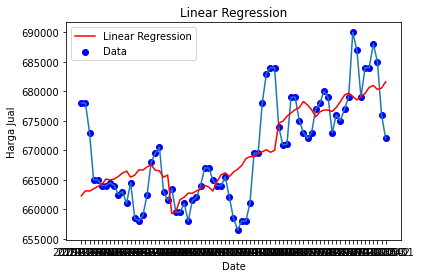

In [7]:
import matplotlib.dates as mdates
def plot(y_pred, data_all):
    fig, ax1 = plt.subplots()
    plt.plot(data_all.Tanggal, data_all.HargaJual)
    # monthyearFmt = mdates.DateFormatter('%Y-%m')
    # ax1.xaxis.set_major_formatter(monthyearFmt)
    # # _ = plt.xticks(rotation=90)
    plt.plot(data_all.Tanggal, y_pred, c='r', label='Linear Regression')
    plt.scatter(data_all.Tanggal, data_all.HargaJual, c='b', label='Data')
    plt.xlabel('Date')
    plt.ylabel('Harga Jual')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()
plot(y_pred, df)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_all, y_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_all, y_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_all, y_pred)))

MSE: 34953682.306
MAE: 4409.157
R^2: 0.545
